In [37]:
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

model = torch.hub.load("chenyaofo/pytorch-cifar-models", "cifar10_resnet20", pretrained=True)

# print out the model's structure
print(model)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

img = plt.imread("HEAAN/run/luis.png")

img = transform(img)

img = img.unsqueeze(0)

print(img.shape)

CifarResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias

Using cache found in /Users/aws/.cache/torch/hub/chenyaofo_pytorch-cifar-models_master


In [22]:
def precision(correct, approx):
    absolute = sum(abs(correct - approx))/len(correct)
    relative = absolute / (sum(abs(correct))/len(correct))
    return 1 - relative

In [146]:
def plot_error(actual, approx):
    plt.plot(actual)
    plt.plot(approx)

    err = approx - actual
    plt.figure()
    plt.hist(err, bins=100)
    plt.xlim(-5, 5)
    plt.title("Distribution of Error")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.show()

(16384,) (16384,)
0.19741464655995278


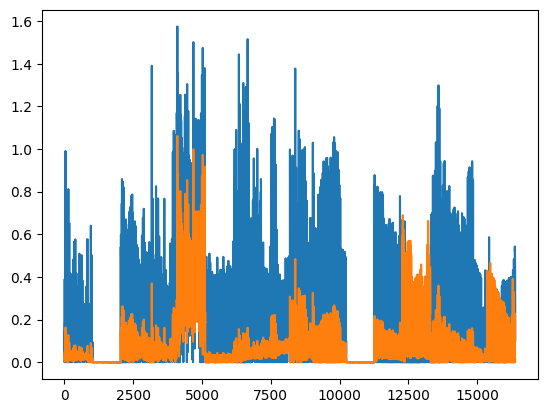

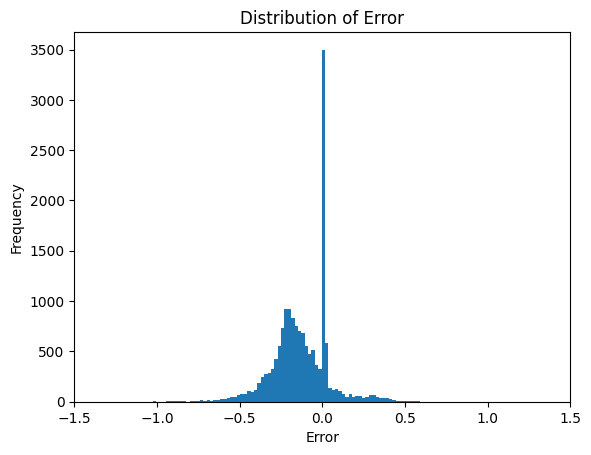

In [133]:
l0_he = np.loadtxt("data/Layer0.txt").reshape(-1)
l0 = model.relu(model.bn1(model.conv1(img))).reshape(-1).detach().numpy()

# weight = model.bn1.weight.detach().numpy()
# bias = model.bn1.bias.detach().numpy()
# mean = model.bn1.running_mean.detach().numpy()
# var = model.bn1.running_var.detach().numpy()
# print(weight, bias, mean, var)

print(l0_he.shape, l0.shape)

print(precision(l0, l0_he))

plot_error(l0, l0_he)


(16384,) (16384,)
0.02504152936825388


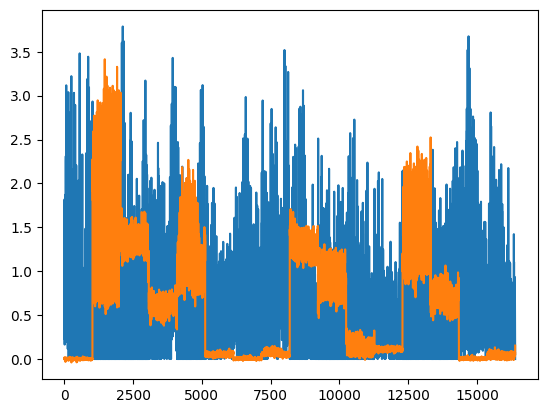

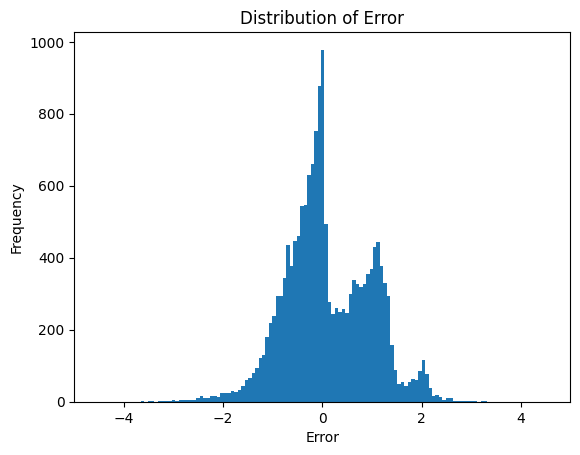

In [151]:
l1_he = np.loadtxt("data/Layer1.txt").reshape(-1)
l1 = model.layer1(model.layer1[0](model.relu(model.bn1(model.conv1(img))))).reshape(-1).detach().numpy()

# weight = model.bn1.weight.detach().numpy()
# bias = model.bn1.bias.detach().numpy()
# mean = model.bn1.running_mean.detach().numpy()
# var = model.bn1.running_var.detach().numpy()
# print(weight, bias, mean, var)

print(l1_he.shape, l1.shape)

print(precision(l1, l1_he))

plot_error(l1, 20 * l1_he)


(256,)
tensor([[[[-1.0000, -0.9688, -0.9375, -0.9062, -0.8750, -0.8438, -0.8125,
           -0.7812],
          [-0.7500, -0.7188, -0.6875, -0.6562, -0.6250, -0.5938, -0.5625,
           -0.5312],
          [-0.5000, -0.4688, -0.4375, -0.4062, -0.3750, -0.3438, -0.3125,
           -0.2812],
          [-0.2500, -0.2188, -0.1875, -0.1562, -0.1250, -0.0938, -0.0625,
           -0.0312],
          [ 0.0000,  0.0312,  0.0625,  0.0938,  0.1250,  0.1562,  0.1875,
            0.2188],
          [ 0.2500,  0.2812,  0.3125,  0.3438,  0.3750,  0.4062,  0.4375,
            0.4688],
          [ 0.5000,  0.5312,  0.5625,  0.5938,  0.6250,  0.6562,  0.6875,
            0.7188],
          [ 0.7500,  0.7812,  0.8125,  0.8438,  0.8750,  0.9062,  0.9375,
            0.9688]],

         [[-1.0000, -0.9688, -0.9375, -0.9062, -0.8750, -0.8438, -0.8125,
           -0.7812],
          [-0.7500, -0.7188, -0.6875, -0.6562, -0.6250, -0.5938, -0.5625,
           -0.5312],
          [-0.5000, -0.4688, -0.4375, -0.

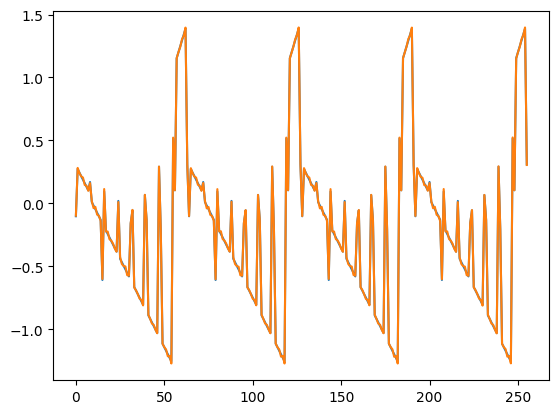

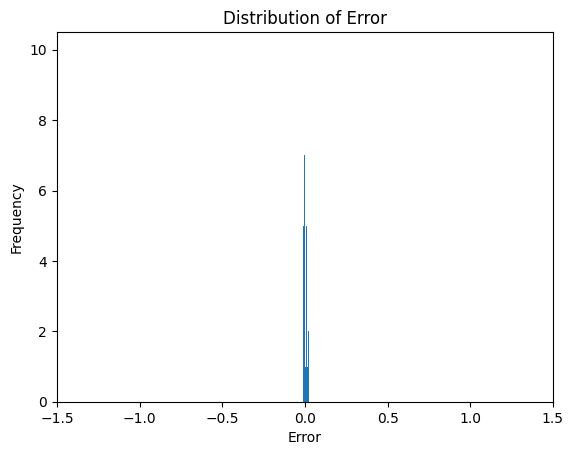

In [104]:
conv_he = np.loadtxt("data/conv.txt").reshape(-1)

print(conv_he.shape)
input_tensor = torch.arange(64, dtype=torch.float32).repeat(3).reshape(1, 3, 8, 8)
# print(input_tensor)
input_tensor = ((input_tensor / 64) - 0.5) * 2
print(input_tensor)
# Build a Conv2D module with the specified kernel size and padding
conv_layer = torch.nn.Conv2d(in_channels=3, out_channels=4, kernel_size=(3, 3), padding=(1, 1), bias=False)
conv_layer.weight.data = torch.tensor([[[[0.1, 0.2, -0.3], 
                                         [0.4, -0.5, 0.6], 
                                         [-0.7, 0.8, -0.9]]] * 3] * 4, dtype=torch.float32)
output_tensor = conv_layer(input_tensor)

conv_o = output_tensor.reshape(-1).detach().numpy()

print(conv_he, conv_o)

print(precision(conv_o, conv_he))

plot_error(conv_o, conv_he)
